# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [ ]:
import os
import pandas as pd

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

Target                     1.000000
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
povertyPercent             0.413260
PctHS25_Over               0.409915
PctPublicCoverage          0.391899
PctUnemployed16_Over       0.362612
PctHS18_24                 0.266285
PctBlack                   0.236380
PctNoHS18_24               0.090565
MedianAgeFemale            0.008665
MedianAge                 -0.000039
studyPerCap               -0.024729
MedianAgeMale             -0.027263
AvgHouseholdSize          -0.045545
BirthRate                 -0.088543
avgDeathsPerYear          -0.094048
popEst2015                -0.130122
avgAnnCount               -0.150019
PctWhite                  -0.174521
PctAsian                  -0.181948
PctOtherRace              -0.182602
PctSomeCol18_24           -0.186140
PctEmpPrivCoverage        -0.259006
PercentMarried            -0.266153
PctBachDeg18_24           -0.284566
PctMarriedHouseholds      -0.290645
PctPrivateCoverageAlone   -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d27ad0130>,
      dtype=object)

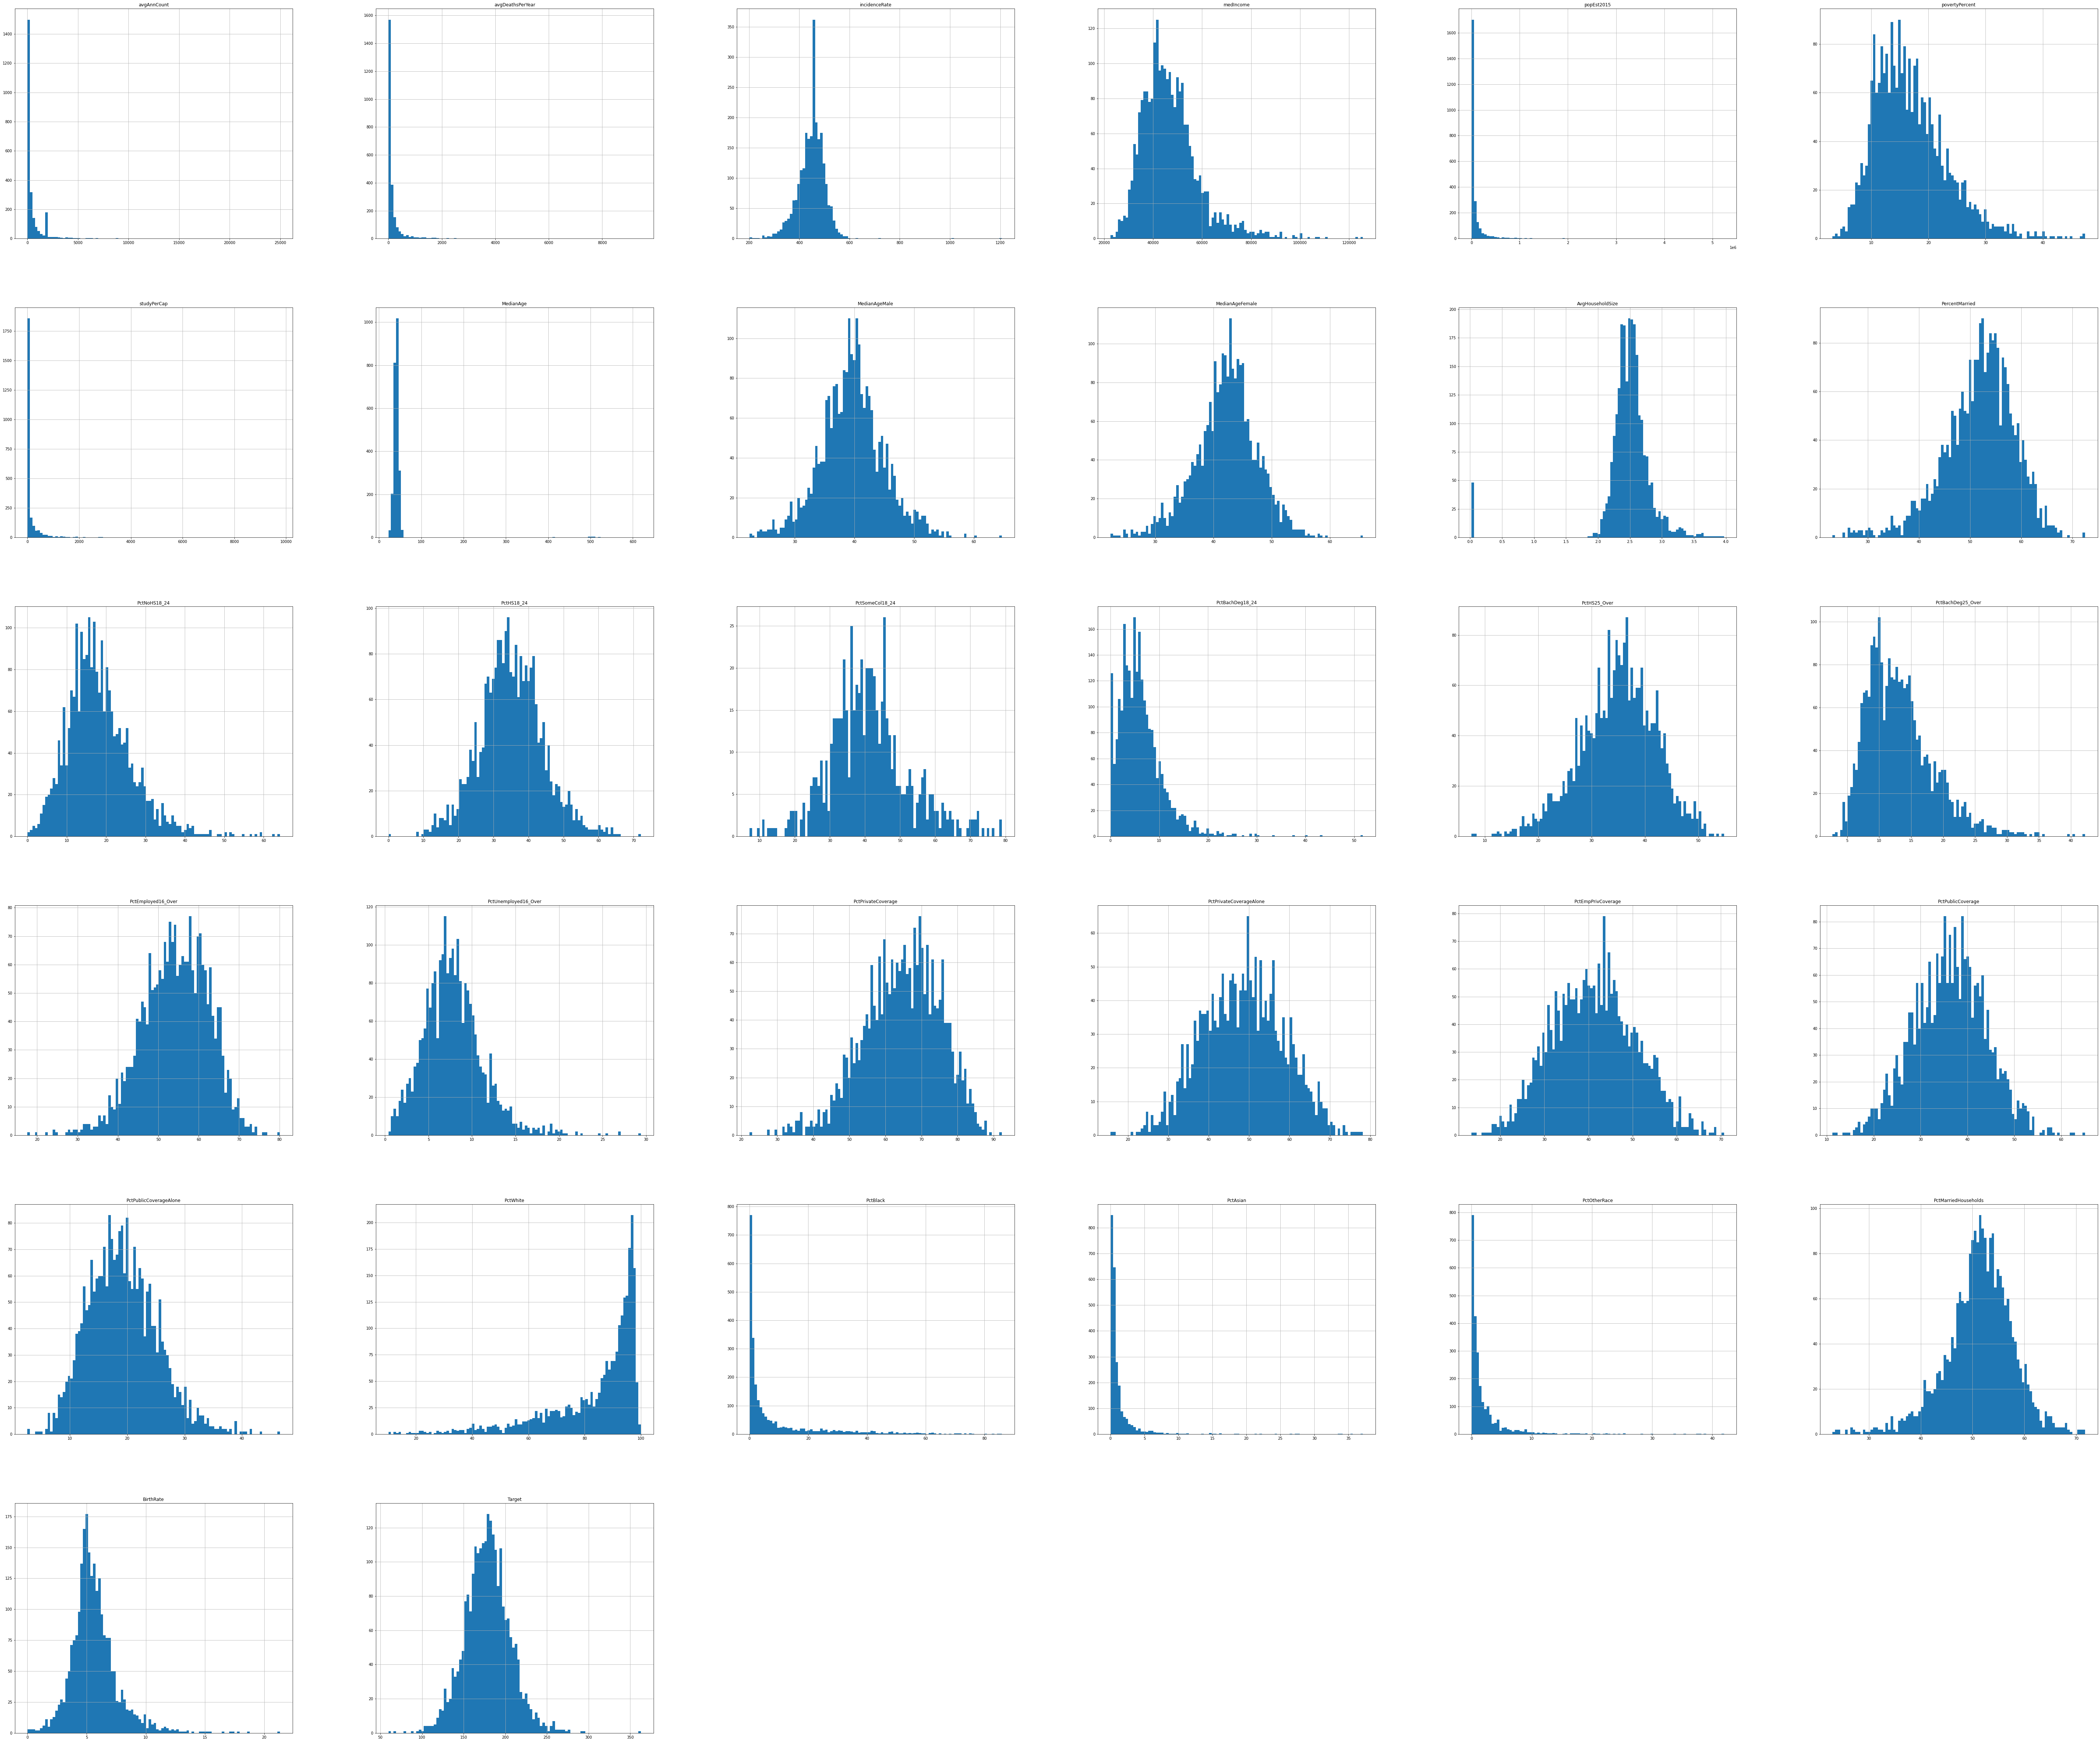

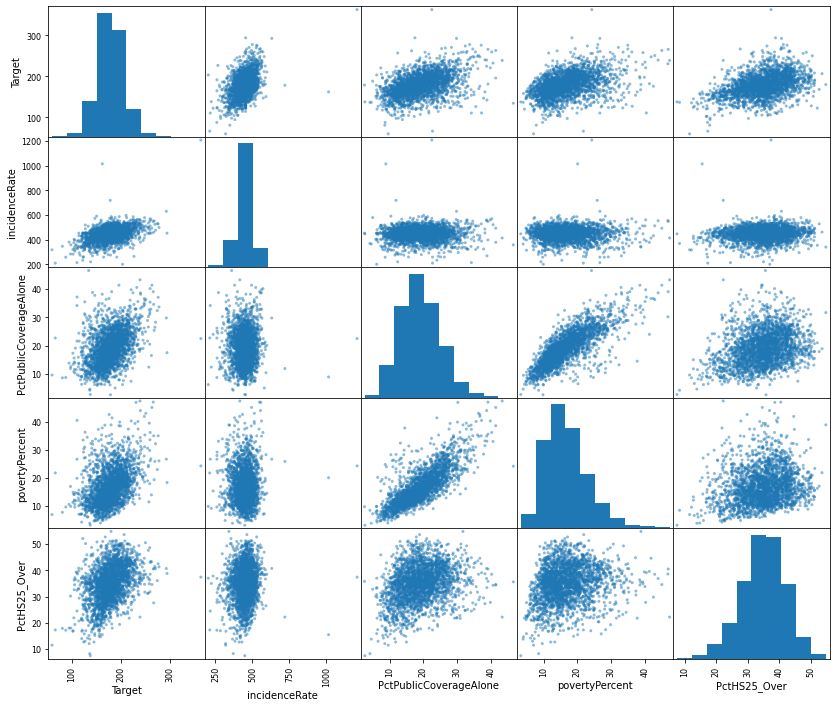

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

df=pd.read_csv(training_data_path)

tgt=pd.read_csv(training_targets_path)
df["Target"]=tgt
df.hist(bins=100,figsize=(100,85))











corr_matrix=df.corr()
c=corr_matrix["Target"].sort_values(ascending=False)
print(c)

c = pd.DataFrame(c).transpose()

print(c.columns)
#Plot correaltion between top 5 correaled features with target
scatter_matrix(df[list(c.columns)[0:5]],figsize=(14,12))









The  distribution of different features were plotted. The following anomalies were observed.

1) There are counties whose median age is greater than 200 years. This is more than the expected lifespan of human

2) There are counties which have a household size of zero. This would probably be if the there were counties with signanificant amount of poverty, but the maximum poverty rate a county seems to be within the range of 40-50%.r

The top 5 features with the maximum correaltion with the target are

1) Median income

2) Poverty percent

3)pctbach_over25

4)publichealthcoveeragealone

5)Incident rate

There seems to be visible correlation if we consider any pair of atrributes the first four in the list. We make the following observations

1)Counties with high percentage of pctbach_over25 have a high median income

2)Counties with high median income have low publichealthcoveeragealone and Poverty percent

3))Counties with high pctbach_over25 have low publichealthcoveeragealone and low Poverty percent




# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

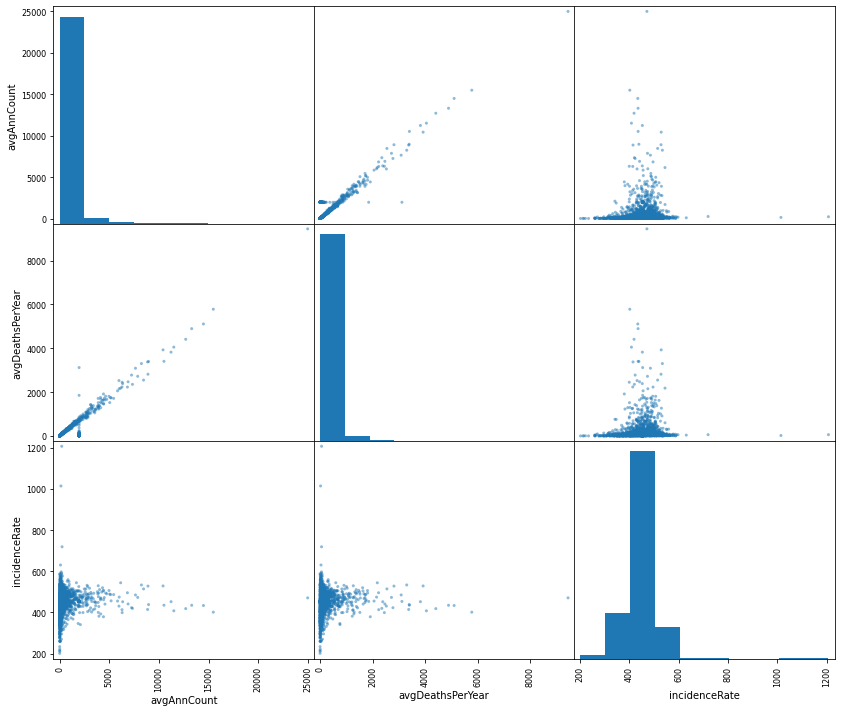

In [ ]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
# Analyse the correlation beween feautues to compute mpc
scatter_matrix(df[["avgAnnCount","avgDeathsPerYear","incidenceRate"]],figsize=(14,12))

def pre_process(df):

  #Remove PctSomeCol18_24 due to insufficient data
  df.drop(['PctSomeCol18_24'],axis=1,inplace=True)

  #compute mpc

  df['mpc']=np.multiply(np.divide(df['avgDeathsPerYear'],df['avgAnnCount']),df['incidenceRate'])



  df.drop('avgAnnCount',axis=1,inplace=True )
  df.drop('incidenceRate',axis=1,inplace=True )




# Transformer to correct outliers.
class correct_outliers(BaseEstimator):
    
    def __init__(self, impute_age=False,impute_hhs=False):

      self.impute_age=impute_age

      self.impute_hhs=impute_hhs
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):

        if  self.impute_age:
          X['MedianAge'] = np.where(X['MedianAge']>=120, (X['MedianAgeMale']+X['MedianAgeFemale'])/2, X['MedianAge'])

        if self.impute_hhs:

          X['AvgHouseholdSize'] = np.where(np.floor(X['AvgHouseholdSize'])<=1, np.nan, X['AvgHouseholdSize'])
          mean=X['AvgHouseholdSize'].mean()
      
          X['AvgHouseholdSize'].fillna(mean,inplace=True)
        
        return X




df.drop('Target',axis=1,inplace=True)

num_pipeline = Pipeline(
    
    [('Transformer',correct_outliers(impute_age=True,impute_hhs=True)),
    
    
    ('imputer',SimpleImputer(strategy="median")),

    ('std_scaler',StandardScaler())

    ]
)

pre_process(df)
    
df_tr=num_pipeline.fit_transform(df)








1. We discard the  PctSomeCol18_24 attribute , as there is insufficient data to provide any evidence of it having a significant correlation with the target attribute.

2. We impute the outlier values in median age as there exists some unrealistic values (ie very high vaues), which could also be a reason behind why the correlation between median age and target is not significant enough. We need to replace these values by a good approximation. One methis to   compute the median age of the county by taking the average of the male median age and female median age. 

3. There wese some counties where the average household size was zeroe. Clearly these values are outliers. We impute them by taking the mean as the disribution plot of the Average household size was symmetric. 

4. It was observed that different values had different scales for which we make the data more uniform by using the stanadard scalar transnformation from scikit learn.

5. Since we are interested in the mortality, it would also be useful to compute the mortality per capita(mpc). We do this by the formula:
mpc=(Avganncount/AvgDeathsperyear)*incidenceRate. Prior to this we check for corelation between incidentRate,Avganncount and AvgDeathperYear. By observing  the scatterplot between Avdanncount and AvgDeathperYear, it appears that these features are linearly correlated. Thus, it would be reasonable to remove one of these features completly, otherwise it could lead to overfitting.  We chose to remove AvgAnnCount attribute. We also remove the incidence rrate coattribute completely as it would be hightly correlated with the mpc attribute since  Avganncount/AvgDeathsperyear for a given county would tend to a constant value which is essentially the slope of the linear line the at would fit the correlation. 

# **Exercise 3**

# Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)

In [ ]:


from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import numpy as np



#Do cross validation on ols regression with no regualrisation weight.
ols=LinearRegression()

cv_score_ols=cross_val_score(ols,df_tr,tgt.values.ravel(),scoring="neg_mean_squared_error",cv=23)

score_ols=np.sqrt(-cv_score_ols.mean())



def compute_score(regressor,alpha):

  if regressor=="LASSO":

    model=linear_model.Lasso(alpha)


  elif regressor=="RIDGE":

    model=linear_model.Ridge(alpha)

  

  cv_score=cross_val_score(model,df_tr,tgt.values.ravel(),scoring="neg_mean_squared_error",cv=23)

  return np.sqrt(-cv_score).mean()




'''
Compute bound where the optimal regularision weight lies. inc is the desired difference bewtween the endpoints of the bound. The lower the value the more precise the bound
'''
def get_bounds(regressor,inc):


  lb=0

  ub=inc


  while compute_score(regressor,lb)-compute_score(regressor,ub)>0:

    lb+=inc

    ub+=inc


  if lb>0:

    lb=lb-inc

  return lb,ub

  

  
'''
Exhaustively search for the best regularisation weight between bound [lb,ub] and plot the graph between regularisation weight and RMSE score
'''

def tune(regressor,lb,ub,num):

  alpha_vals=np.linspace(lb,ub,num)

  scores=[]
  
  for val in alpha_vals:

    if regressor=="LASSO":

      model=linear_model.Lasso(val)

    elif regressor=="RIDGE":

      model=linear_model.Ridge(val)

    cv_scores =cross_val_score(model, df_tr,tgt.values.ravel(),scoring="neg_mean_squared_error",cv=23)

    score = np.sqrt(-cv_scores).mean()

    scores.append(score)


  alpha_best=alpha_vals[scores.index(min(scores))]

  score_best=min(scores)

 

  plt.plot(alpha_vals,np.array(scores).transpose())

  plt.xlabel("Alpha")

  plt.ylabel("RMSE score")

  if regressor=="LASSO":

    plt.title("Hyper tuning of lasso regresso")



  if regressor=="RIDGE":


    plt.title("Hyper tuning of ridge regressor")

  plt.show()

  return alpha_best,score_best













/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.259e+05, tolerance: 1.768e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet

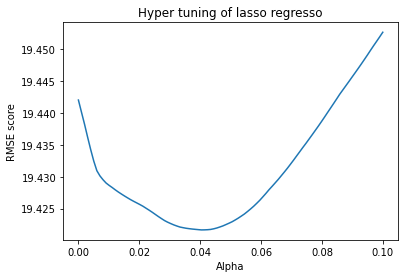

In [ ]:
lb,ub=get_bounds("LASSO",0.1)

a_lasso,score_lasso=tune("LASSO",lb,ub,100)

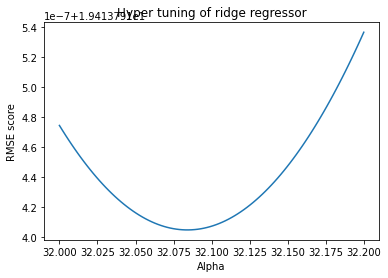

In [ ]:
lb,ub=get_bounds("RIDGE",0.1)
a_ridge,score_ridge=tune("RIDGE",lb,ub,100)


# Evaluation of model:

Scoring Metric: The metirc used is Root mean square error(RMSE). This metric is useful as it it easier to detect large errors and can also be useful for comparison between different models. The lower the value, the better the performance 

Methodology: The method used to hypertune parameters makes use of k fold cross validation where the training set is partitioned into k partions such that each partion has a minimal overlap. In this case k=23. In each iteration we ue fit the model on k-1 partitions and train it  on the remaining partition. The score is recored. This is repated k times till all model has been tested on all the paritions. The final score is the mean of all scores.  This method was chosen as it  tends to give a more holistic evaluation of the model as it enforces testing on all aspects of the dataset.


# Tuning of Lasso and Ridge regressor:

We expect that  as the value of the regulariser increase the RMSE score decreases at first and then increases. This is expected due to the bias and variance tradeoff. As we increase  the value of the regulariser
some of the weights assigned to a feature might shrink to zero. This decrease the complexity and increases the bias and decreases the variance. As a result the complexity of a model decresaseS and the bias and variance may tend to an optimal value for some value of regualriser. If we continue to increase the value of alpha after finding the optimal one , this could lead to underfitting , hence a higher value of the loss function(in this case RMSE).  To get the best optimal value  we  first implement an algorithm the computes the bound in which the optimal alpha value potentially lies. We find three equally spaced points a1,a2,and a3 such that a1<a2<a3 and the given  model with a2 as the regualrisation weight should have shoul yield the least value of loss function that we want to minimise(In this case RMSE) .  We then exhaustively look for the regualriser within that bound(ie [a1,a2]) which yields the best score.  



# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

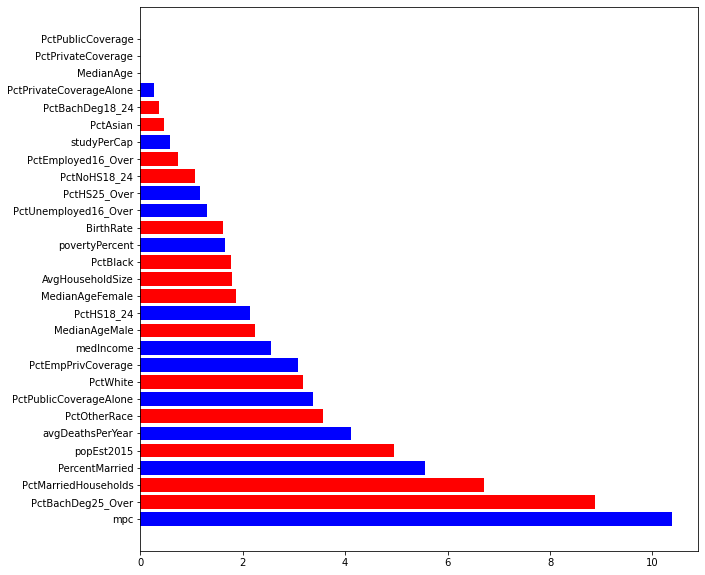

In [ ]:
best_lasso=linear_model.Lasso(a_lasso)

best_ridge=linear_model.Ridge(a_ridge)

best_lasso.fit(df_tr,tgt)






importance_one=best_lasso.coef_

def sort_features(weights):

	colors=[]
	important_features_dict={}

	for idx, val in enumerate(weights):
			important_features_dict[idx] =abs(val)
	 		
			

	important_features_list = sorted(important_features_dict,
																	key=important_features_dict.get,
																	reverse=True)

	coef=[]
	features=[]

	for f in important_features_list:

		coef.append(important_features_dict[f])
		features.append(df.columns[f])
		if weights[f]<0:
				colors.append("red")
		
		else:
				
				colors.append("blue")
	
	return coef,features,colors
 

fig= plt.figure(figsize=(10, 10))


c,f,colors=sort_features(importance_one)
 
plt.barh(f,np.array(c).transpose(),color=colors)

plt.show()

 






We consider the relvance of a feature by taking account of the maginitude of the weight. The higher the magnitude the greater is the relevance of the feature. Note that red bars indicate negative weight and blue bars indicate positive weights. The top 5 relevant features are:

1)mpc(Positive weight)

2)PctBachDeg25_Over(Negative weight)

3)PctMarriedHouseholds(Negative weight)

4)PercentMarried(Positive weight)

5)PopEst2015(Negative weight)




# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import GridSearchCV

param_grid  = [{'bootstrap': [True],'n_estimators': [100],'max_features':[5,10,15,20,25,29]}, 
               ]

forest_reg=RandomForestRegressor(random_state=5)


grid_search = GridSearchCV(forest_reg, param_grid, cv=23,scoring='neg_mean_squared_error')

grid_search.fit(df_tr, tgt.values.ravel())


cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  
  print(np.sqrt(-mean_score),params)



print(grid_search.best_estimator_)


fr_best=grid_search.best_estimator_













12.597958073310892 {'bootstrap': True, 'max_features': 5, 'n_estimators': 100}
10.745012528570195 {'bootstrap': True, 'max_features': 10, 'n_estimators': 100}
10.082458064491583 {'bootstrap': True, 'max_features': 15, 'n_estimators': 100}
9.899554609287438 {'bootstrap': True, 'max_features': 20, 'n_estimators': 100}
10.017554558792884 {'bootstrap': True, 'max_features': 25, 'n_estimators': 100}
10.331177994969439 {'bootstrap': True, 'max_features': 29, 'n_estimators': 100}
RandomForestRegressor(max_features=20, random_state=5)


# Grid search strategy

Inorder to pick the best random forest regressor, we  select them based on the parameter `max_features`. We set `bootstrap=True` inorder to ensure that each decision tree in the ensamble is allocated  some sample data to train on from the training set. We do not tweak the other parameters that constraint the sizee of the tree. One consequence of this could be that each decision tree might over fit on the sample data that they may have been allocated to train. This is admissible as each sample would be different  and the prediction would be the aggregate prediction of each decision tree. In this way prediction produce would be more or less representative of the overall training data. 

<BarContainer object of 29 artists>

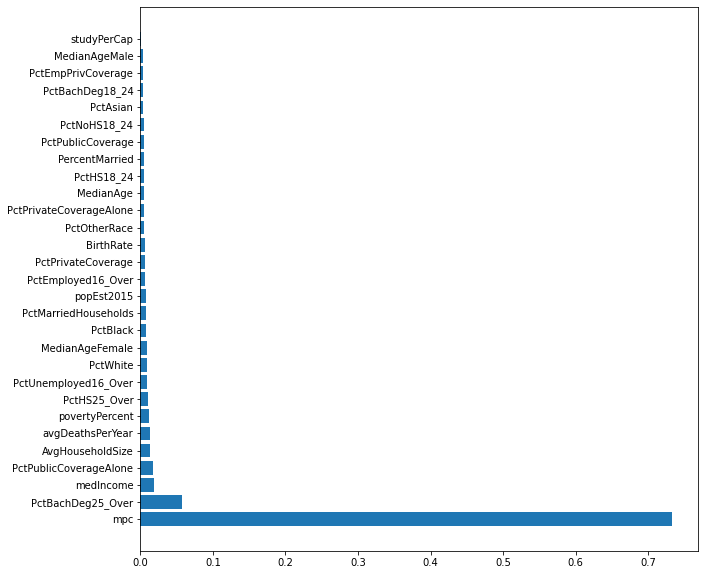

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

fr_best.fit(df_tr,tgt.values.ravel())

importances = fr_best.feature_importances_

c,f,cols=sort_features(importances)
fig= plt.figure(figsize=(10, 10))






plt.barh(f,np.array(c).transpose())






The histogram plot shows the feature importance assigned to each attriburte. It was observed that according to the best model was the one that used at most 25 features to split the node of a tree. The above histogram plot reveals the most important features. The top 5 relevant features identifies by random forest regresssion are:

1)mpc

2)PctBachDeg25_Over

3)Median income

4)PctPublicCoverage alone

5)AvgHousehold size.

It turns out the most important features identified by the model are the ones that were highly correlated to the target attribute. This is not the case for lasso regression ie features that are positively correlated may not be neccessarily assigned a higher weight. One reason for this could be because of presence of correlation between features. As a result some of the that may have some degree of positive correlation may be assigned negative weights to minimise the error between target and predicted values. As a reuslt, the relevance distribution of features might appear more skewed than Lasso regression. 

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [ ]:
## Read in the provided example test data
from sklearn.metrics import mean_squared_error
 
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'


# Convsert csv file to pandas dataframe
test_data = pd.read_csv(test_data_path)

test_targets = pd.read_csv(test_targets_path)

#Apply pre processing techniques  done in exc 3 to test set
pre_process(test_data)




test_data=num_pipeline.fit_transform(test_data)

def  evaluate(model):
  # fit model to  entire training set

  model.fit(df_tr,tgt.values.ravel())

  #Let the model predict based on feature values of samples of unseen test  data

  final_predictions=model.predict(test_data)

  #Compute the mean squared error between predicted and expected values

  final_mse =mean_squared_error(test_targets,final_predictions)

  return np.sqrt(final_mse)


print("Score for  random forest:"+str(evaluate(fr_best))+"(Root mean squared error)")


print("Score for  best lasso:"+str(evaluate(best_lasso))+"(Root mean squared error)")


print("Score for best ridge:"+str(evaluate(best_ridge))+"(Root mean squared error)")


print("Score for ols:"+str(evaluate(ols))+"(Root mean squared error)")










## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

Score for  random forest:8.532729135511111(Root mean squared error)
Score for  best lasso:15.773396985845718(Root mean squared error)
Score for best ridge:15.788110950918881(Root mean squared error)
Score for ols:15.834668492429321(Root mean squared error)


The inference script follows the following steps while evaluating a given model:

1)fit model to  entire training set

2)Let the model predict based on feature values of samples of unseen test  data

3)Compute the mean squared error between predicted and expected values